# Create a Environment

In this unit we are going to create a very simple environment that follows the class structure given by the gymnasium library which is like a standard in Reinforcement Learning.

The environment will be a simple 3x3 board which is a maze game rendered using matplotlib.
There is going to be an agent that starts in the (0,0) position (top,left) and the objective is to reach the goal at position (2,2) (bottom, right).

The functions to render the game are given.

Create a class with the following functions:
- `def __init__(self, render_mode=None)`
- `def reset(self) -> observation`
- `def step(self, action) -> return observation, reward, terminated, truncated`
- `def render(self)`
- `def close(self)`

In [15]:
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class MazeGameEnv():

    def __init__(self, render_mode=None):
        self.render_mode = render_mode
        self.max_steps = 100
        self.step_count = 0
        self.board = [
            ['😊', '😺', ' '],
            [' ', ' ', ' '],
            ['😺', ' ', '😍']
        ]
        self.player_pos = (0, 0)
        self.goal_pos = (2, 2)
        self.board_history = []
        self.action_space = 4  # Up, Down, Left, Right
        self.observation_space = (3, 3)


    def reset(self):
        self.step_count = 0
        self.player_pos = (0, 0)
        self.board[0][0] = '😊'
        self.board[2][2] = '😍'
        self.board_history = []

        self.render()

        observation = self.player_pos
        return observation

    def step(self, action):
        self.step_count += 1
        x, y = self.player_pos
        if action == 0 and x > 0:  # Up
            x -= 1
        elif action == 1 and x < 2:  # Down
            x += 1
        elif action == 2 and y > 0:  # Left
            y -= 1
        elif action == 3 and y < 2:  # Right
            y += 1

        self.board[self.player_pos[0]][self.player_pos[1]] = ' '
        self.player_pos = (x, y)
        self.board[x][y] = '😊'

        terminated = self.player_pos == self.goal_pos
        truncated = self.step_count >= self.max_steps
        reward = 1 if terminated else -1

        self.render()

        observation = self.player_pos
        return observation, reward, terminated, truncated


    def render(self):
      if self.render_mode == "human" or self.render_mode == "rgb_array":
        self._render_frame()

    def _render_frame(self):
      fig, ax = plt.subplots()
      ax.set_xticks(np.arange(0, 4, 1))
      ax.set_yticks(np.arange(0, 4, 1))
      ax.grid(True, color='black')

      if self.player_pos == self.goal_pos:
          self.board[self.goal_pos[0]][self.goal_pos[1]] = '😊😍'

      [[ax.text(j + 0.5, 2.5 - i, self.board[i][j], ha='center', va='center', fontsize=50, color='blue') for j in range(3)] for i in range(3)]

      buf = BytesIO()
      fig.savefig(buf, format='png')
      buf.seek(0)
      img = mpimg.imread(buf)
      self.board_history.append(img)
      buf.close()
      if self.render_mode != "human":
          plt.close(fig)
      return img

    def close(self):
        plt.close()

In [16]:
env = MazeGameEnv(render_mode="rgb_array")

env.reset()

env.step(1)
env.step(3)
env.step(1)
env.step(3)

((2, 2), 1, True, False)

((2, 2), 1, True, False)

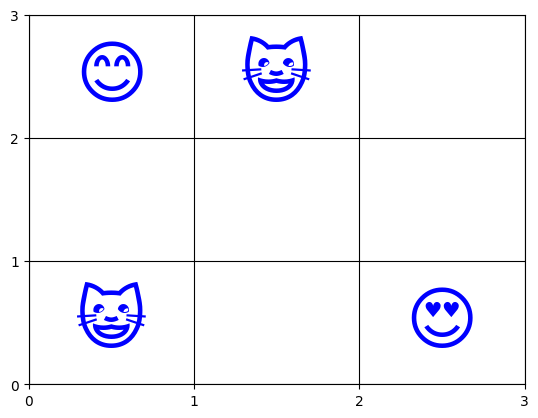

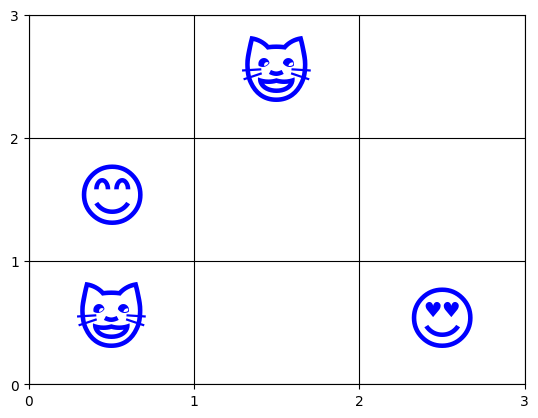

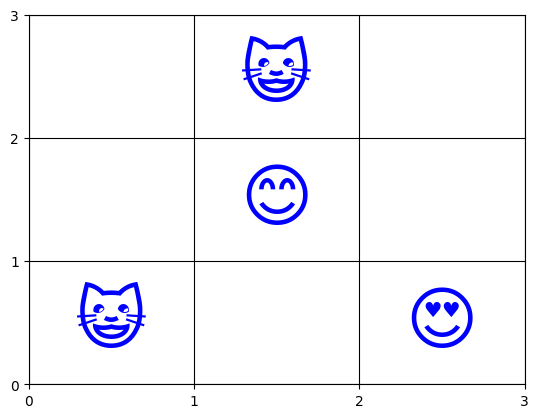

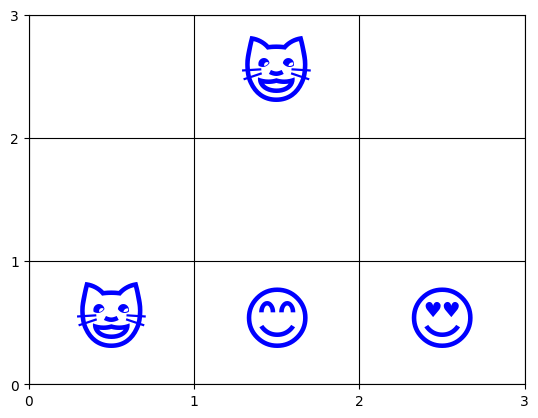

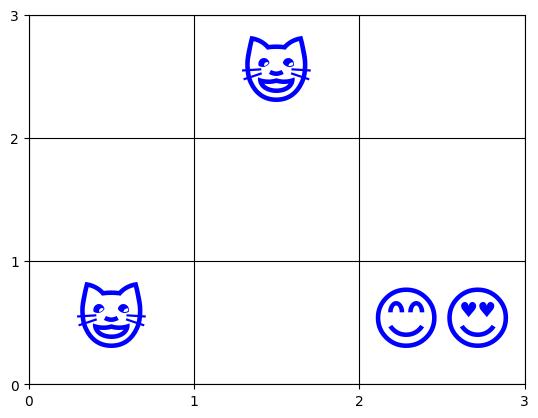

In [17]:
env = MazeGameEnv(render_mode="human")

env.reset()

env.step(1)
env.step(3)
env.step(1)
env.step(3)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

def animate_board_history(board_history):
    fig, ax = plt.subplots()
    img_plot = ax.imshow(board_history[0])  # Initial plot

    def update(frame):
        img_plot.set_data(board_history[frame])
        return img_plot,

    ani = FuncAnimation(fig, update, frames=len(board_history), interval=500, blit=True)
    plt.close(fig)
    return ani

animate_board_history(env.board_history)